In [1]:
%reload_ext autoreload
%autoreload 2

In [24]:
import os
import json
import pandas as pd
import shutil
from PIL import Image
from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT
from k12libs.utils.nb_dataset import k12ai_compute_mean_std 
from sklearn.model_selection import train_test_split

## 1. Mean and Std

In [ ]:
datadir = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'cifar10')
jfiles = ['train.json', 'val.json', 'test.json']
mean, std = k12ai_compute_mean_std(datadir=datadir, jfiles=jfiles)

In [15]:
mean, std

(tensor([0.4917, 0.4826, 0.4472]), tensor([0.2011, 0.1989, 0.2015]))

| mean | std |
| :---: | :---: |
|<img width=200/> | <img width=200/>
| [0.4917, 0.4826, 0.4472] | [0.2011, 0.1989, 0.2015] |

## 裁剪

In [10]:
train_val_json = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'cifar10', 'train_val.json')
items = []
with open(train_val_json, 'r') as f:
    items = json.load(f)
len(items)

50000

In [11]:
train_val_df = pd.read_json(train_val_json, encoding="utf-8", orient='records')
train_val_df[:5]

,image_path,label
0,imgs/train/00000.jpg,6
1,imgs/train/00001.jpg,9
2,imgs/train/00002.jpg,9
3,imgs/train/00003.jpg,4
4,imgs/train/00004.jpg,1


In [12]:
grouped_by_label = train_val_df.groupby('label')
grouped_by_label.count()

,image_path
label,
0,5000
1,5000
2,5000
3,5000
4,5000
5,5000
6,5000
7,5000
8,5000


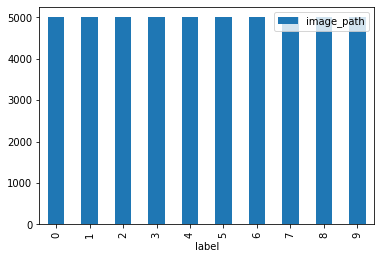

In [13]:
grouped_by_label.count().plot(kind='bar');

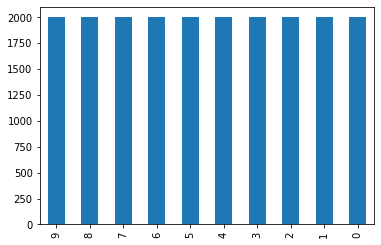

In [14]:
# 合理: 先分组, 然后组中随机样本
reduced_df = train_val_df.groupby('label').apply(pd.DataFrame.sample, n=2000, random_state=20, replace=False)
reduced_df['label'].value_counts().plot(kind='bar');

In [16]:
reduced_shuffle_df = reduced_df.sample(frac=1)
reduced_shuffle_df[15:25]

image_path  label
label                                   
3     27628  imgs/train/27628.jpg      3
7     38145  imgs/train/38145.jpg      7
4     40981  imgs/train/40981.jpg      4
7     13351  imgs/train/13351.jpg      7
3     26797  imgs/train/26797.jpg      3
0     48856  imgs/train/48856.jpg      0
6     2203   imgs/train/02203.jpg      6
0     2142   imgs/train/02142.jpg      0
      33368  imgs/train/33368.jpg      0
4     42035  imgs/train/42035.jpg      4

In [17]:
train_valid_df, test_df = train_test_split(reduced_shuffle_df, test_size=0.2)
train_df, valid_df = train_test_split(train_valid_df, test_size=0.2)
len(train_df), len(valid_df), len(test_df), len(reduced_shuffle_df)

(12800, 3200, 4000, 20000)

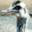

In [22]:
image_path = test_df[0:10]['image_path'].tolist()[0]
image_path = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'cifar10', image_path)
Image.open(image_path)

In [25]:
def generate_rdogsvscats(df, phase):
    src_root = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'cifar10')
    dst_root = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'rcifar10')
    
    img_path = os.path.join(dst_root, 'imgs', phase)
    shutil.rmtree(img_path, ignore_errors=True)
    os.makedirs(img_path)
    
    results = []
    items = df.to_dict(orient='records')
    print(f'{phase} count: {len(items)}')
    for item in items:
        filename = os.path.basename(item['image_path'])
        src_path = os.path.join(src_root, item['image_path'])
        dst_path = os.path.join(img_path, filename)
        if not os.path.exists(src_path):
            print('not found:', src_path)
        if os.path.exists(dst_path):
            print('replce found:', dst_path)
        results.append({
            'image_path': f'imgs/{phase}/{filename}',
            'label': item['label']
        })
        # Image.open(src_path).resize((256, 256)).crop((16, 16, 240, 240)).save(dst_path)
        shutil.copy2(src_path, dst_path)
        
    with open(os.path.join(dst_root, f'{phase}.json'), 'w') as f:
        json.dump(results, f)
        
generate_rdogsvscats(test_df, 'test')
generate_rdogsvscats(train_df, 'train')
generate_rdogsvscats(valid_df, 'val')

test count: 4000
train count: 12800
val count: 3200


In [26]:
datadir = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'rcifar10')
jfiles = ['train.json', 'val.json', 'test.json']
mean, std = k12ai_compute_mean_std(datadir=datadir, jfiles=jfiles)

In [27]:
mean, std

(tensor([0.4915, 0.4824, 0.4468]), tensor([0.1991, 0.1969, 0.1994]))